## Please have a twitter developers' account before this class.

# Description:

This code listens to the twitter data in real time, filters the data that has "datascience" in it, and saves the data in a json file. 

# Tweepy 
- handles twitter streaming API by handling the authentication, connection, creating and destroying session, reading incoming messages etc.

# Streaming API Architecture
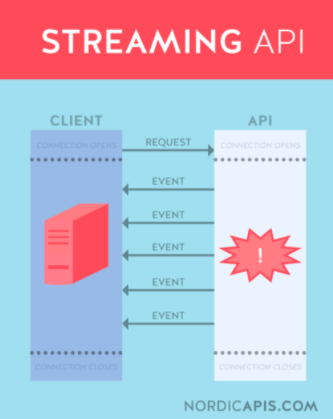

# Three major steps to use streaming API

1 - Create a class inheriting from StreamListener

2 - Using that class, create a Stream object

3 - Connect to the Twitter API using the Stream

# To - Do list
- Below, you are provided a starter code. For the code to work,  please save your twitter credentials in a file .tweepy.json in dictionary format. Otherwise below code will not work. Get below code to work to see the twitter real time stream. 

- Filter twitter data based on geographic location. Get the data only from CA. 

In [1]:
##############################
#Import the necessary methods from tweepy library
#############################

# tweepy is a python wrapper around Twitter API
# It is great for simple automation and for creating twitter bots. 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression

import string
import sys
#import preprocessor as p

In [2]:
# StreamListener class inherits from tweepy.StreamListener
# It overrides on_status and on_error methods. 

# If you're only concerned with tweets, use on_status(). 
# This will give you what you needed without the added 
# information and doing so will not hinder your limit.

# If you want detailed information use on_data(). 
# --That might be the case if you are doing heavy analysis.
# on_data gives info on replies to statuses, deletes, events
# direct messages, friends, limits, disconnects and warnings


class StreamListener(StreamListener):
    def on_status (self, status):
        print(status.id_str)
        print(status.text)

            
    def on_error(self, status_code):
        print("Encountered an error during streaming: ", status_code)
        sys.exit()

In [ ]:
if __name__ == "__main__":
    
    # twitter credentials are saved in the .tweepy.json file as a dictionary
    
    config_file = ".tweepy.json"
    with open(config_file) as fh:
        config = json.load(fh)
    """
    {"access_token"        : '...',
    access_token_secret  '...'
    consumer_key        = '...'
    consumer_secret     = '...'}
    """
    # pass twitter credentials to tweepy, complete authorization and initialize API endpoint
    
    auth = OAuthHandler(config['consumer_key'], config['consumer_secret'])
    auth.set_access_token(config['access_token'], config['access_token_secret'])
    """
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    """
    api = API(auth)
    
    # using update_status of api, you can tweet to your twitter account from your code
    # tweet = api.update_status("Tweeting from the code again in the middle of the night!")
    # initialize stream
    streamListener = StreamListener()
    stream = Stream(auth = api.auth, listener = streamListener, tweed_mode = 'extended')
    
    tracklist = ['corona', 'covid19']
    stream.filter(track = tracklist)

In [ ]:
import tweepy
import json

config_file = ".tweepy.json"
with open(config_file) as fh:
    config = json.load(fh)
        
auth = tweepy.OAuthHandler(config['consumer_key'], config['consumer_secret'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth)


public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

# Get the User object for twitter...
user = api.get_user('elonmusk')

print(user.screen_name)
print(user.followers_count)

for friend in user.friends():
   print(friend.screen_name)